In [28]:
import pandas as pd
df = pd.read_csv('Invistico_Airline.csv')
print(df.shape)
df.head()

(129880, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [29]:
df[df.isna().any(axis=1)].count()[0]

393

### Dropping all NaN values for now

In [30]:
df.dropna(inplace=True)

In [31]:
np.unique(df["Customer Type"])

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [33]:
encoded_df = df
encoded_df["satisfaction"][encoded_df["satisfaction"] == "satisfied"] = True
encoded_df["satisfaction"][encoded_df["satisfaction"] == "dissatisfied"] = False
encoded_df["satisfaction"] = encoded_df["satisfaction"].astype('bool')

encoded_df["Customer Type"][encoded_df["Customer Type"] == "Loyal Customer"] = True
encoded_df["Customer Type"][encoded_df["Customer Type"] == "disloyal Customer"] = False
encoded_df["Customer Type"] = encoded_df["Customer Type"].astype('bool')

encoded_df["Gender"][encoded_df["Gender"] == "Male"] = True
encoded_df["Gender"][encoded_df["Gender"] == "Female"] = False
encoded_df["Gender"] = encoded_df["Gender"].astype('bool')

encoded_df["Type of Travel"][encoded_df["Type of Travel"] == "Business travel"] = True
encoded_df["Type of Travel"][encoded_df["Type of Travel"] == "Personal Travel"] = False
encoded_df["Type of Travel"] = encoded_df["Type of Travel"].astype('bool')

encoded_df["Class"][encoded_df["Class"] == "Business"] = 1
encoded_df["Class"][encoded_df["Class"] == "Eco Plus"] = 0
encoded_df["Class"][encoded_df["Class"] == "Eco"] = -1
encoded_df["Class"] = encoded_df["Class"].astype('int16')

encoded_df.tail()

/tmp/ipykernel_49041/3082518522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df["satisfaction"][encoded_df["satisfaction"] == "satisfied"] = True
/tmp/ipykernel_49041/3082518522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df["satisfaction"][encoded_df["satisfaction"] == "dissatisfied"] = False
/tmp/ipykernel_49041/3082518522.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df["Customer Type"][e

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,True,False,False,29,False,-1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,False,True,False,63,False,1,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,False,True,False,69,False,-1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,False,True,False,66,False,-1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,False,False,False,38,False,-1,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


## Important Feature Selections

- Using any of Random Forest, Decision Tree or other Feature Importance variables

First seperate target and feature variables from the dataframe

In [34]:
X = encoded_df.drop(columns=["satisfaction"])
y = encoded_df["satisfaction"]
print(X.shape, y.shape)

(129487, 22) (129487,)


### Sort features with most influence on decision boundaryA

Just use sklearn's decision tree classifier. It provides feature importance it used to generate that tree and then use it.
I'm too lazy rn to implement that rn.

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X, y)

feature_df = pd.DataFrame(zip(X.columns, dt.feature_importances_), columns=["Features", "Importance"])
feature_df.head()

,Features,Importance
0,Gender,0.027709
1,Customer Type,0.006056
2,Age,0.000000
3,Type of Travel,0.008192
4,Class,0.046675


### ~~Only choosing whose feature importances are not 0 and sorted with highest importance on top~~

Skipping this step to test for regularization

In [36]:
# discardedFeatures = feature_df[feature_df["Importance"]<0.0001]
# discardedFeatures = list(discardedFeatures.sort_values(by="Importance", ascending=False).Features)
discardedFeatures = []

In [37]:
filtered_df = encoded_df.drop(columns=discardedFeatures)
filtered_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,True,False,True,65,False,-1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,True,True,True,47,False,1,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,True,False,True,15,False,-1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,True,False,True,60,False,-1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,True,False,True,70,False,-1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Preparing for Model Training and Testing

In [38]:
import random
train = filtered_df.sample(frac=0.4, random_state=20)
test = filtered_df.drop(index=train.index).sample(frac=0.2, random_state=20)
print(len(train.index), len(test.index))

51795 15538


In [39]:
xTrain = train.drop(columns="satisfaction")
yTrain = train["satisfaction"]

xTest = test.drop(columns="satisfaction")
yTest = test["satisfaction"]

print(xTrain.shape, xTest.shape)

(51795, 22) (15538, 22)


## Feature scaling

In [40]:
def scale(data):
    for col in list(data.columns):
        if data[col].dtype != np.bool_:
            data[col] = (data[col] - data[col].mean())/(data[col].max() - data[col].min())
scale(xTrain)
xTrain.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
12897,False,True,0.174651,False,-0.515696,0.029471,0.232107,0.202155,0.228875,0.202803,...,0.3702,0.106396,0.107033,0.103952,0.076726,0.413901,0.058685,0.129924,-0.011154,-0.011709
48710,False,False,-0.133041,True,0.484304,0.048897,-0.167893,-0.197845,-0.171125,0.202803,...,-0.6298,-0.293604,0.307033,0.303952,0.326726,0.413901,0.058685,-0.270076,-0.011154,-0.011709
119606,False,True,0.033625,True,0.484304,0.161249,-0.167893,-0.197845,-0.171125,-0.197197,...,0.3702,0.306396,0.307033,0.303952,0.326726,0.413901,0.258685,-0.070076,0.030992,0.027353
35449,True,True,-0.235605,False,-0.515696,-0.028372,0.232107,0.202155,0.228875,0.002803,...,-0.1298,-0.093604,0.107033,0.303952,0.326726,-0.086099,0.058685,-0.070076,-0.011154,-0.011709
52820,False,False,-0.209964,True,-0.515696,0.031066,0.032107,0.002155,0.028875,-0.197197,...,-0.3798,-0.293604,0.307033,0.303952,0.326726,0.413901,0.058685,-0.270076,0.008769,0.004697


In [41]:
import numpy as np

def sigmoid(z):
    return 1/(1+2.71828 ** -z[:])

def predict(x, w, b):
    return sigmoid(np.matmul(x, w) + b)

In [42]:
def computeGradient(xT, yT, _w, _bias):
    m,n = xT.shape
    predicted = predict(xT, _w, _bias)

    costs = predicted-yT
    
    dj_db = np.sum(costs)/m
    
    transposedX = np.transpose(xT)
    
    newWeights = np.matmul(transposedX, costs)
    
    dj_dw = np.transpose(newWeights)/m
    
    return dj_dw,dj_db,costs

In [ ]:
#
# Checking for existence of variables in globals
# To make it easy for resuming the training
#
if "w" not in globals():
    w = np.zeros((xTrain.shape[1], ))
if "bias" not in globals():
    bias = 0
if "errorHistory" not in globals():
    errorHistory = []

lrate = 2

if "errorMin" not in globals():
    errorMin = 1

lambda_ = 0.7
while errorMin > 0.01:
    d_w,d_b,costs = computeGradient(xTrain.values, yTrain.values, w, bias)
    
    bias -= lrate * d_b
    w -= (d_w * lrate).astype('float64') + lambda_/xTrain.shape[0] * w

    errorHistory.append(np.sum(np.absolute(costs)))
    if len(errorHistory) > 1:
        errorMin = abs(errorHistory[-2] - errorHistory[-1])
    print("Error: %.2f" % np.sum(np.abs(costs)), " | Diff: %.5f" % errorMin, end='\r')
print("\nDone training")

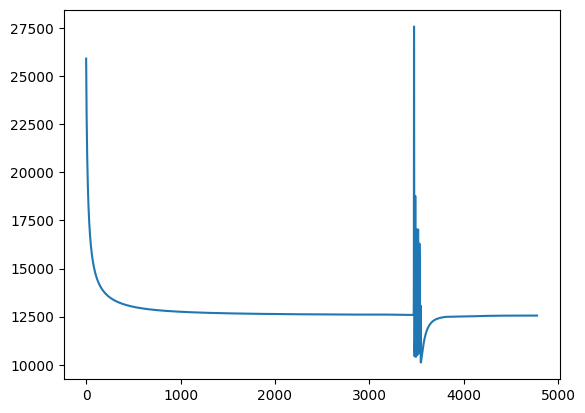

In [112]:
import matplotlib.pyplot as plt
plt.plot(errorHistory)

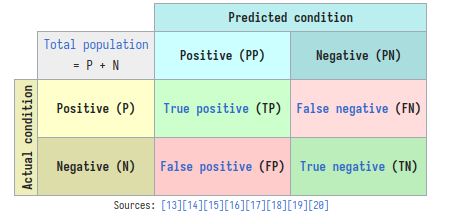

In [113]:
## Actual,Predicted
# True Positive   True Negative
# False Positive  False Negative
def confusionMatrix(predicted, trueVals):
    m = [[0,0], [0,0]]
    for i in range(len(predicted)):
        if trueVals[i]==True:
            if predicted[i] == True:
                m[0][0] += 1
            else:
                m[0][1] += 1
        else:
            if predicted[i] == False:
                m[1][1] += 1
            else:
                m[1][0] += 1
    return m

predictedValues = [False if abs(i) < 0.5 else True for i in predict(xTrain.values, w, bias)]
mse = confusionMatrix(predictedValues, yTrain.values)
print("MSE: ", mse)
print("Error: ", (mse[0][1] + mse[1][0])/len(predictedValues) * 100, " %")

MSE:  [[24098, 4242], [4303, 19152]]
Error:  16.497731441258807  %
